<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
!pip install pandas
!pip install openpyxl 
!pip install sklearn

     |████████████████████████████████| 9.9 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 54.4 MB/s eta 0:00:01��███▍        | 11.2 MB 54.4 MB/s eta 0:00:01


In [24]:
!pip install matplotlib

     |████████████████████████████████| 11.5 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 4.4 MB/s eta 0:00:01


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = pd.read_excel("autos_acp_excel.xlsx",sheet_name="data",header=0,index_col=0)

In [4]:
#dimension 
print(X.shape) # (18, 6) 
#nombre d'observations 
n = X.shape[0] #nombre de variables 
p = X.shape[1] #affichage des données 
print(X)

(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V.MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta 1.66     1570    109   428   162   1060    175
Princess 1800    1798     82   445   172   1160    158
Datsun 200L      1998    115   469   169   1370    160
Taunus 2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda 9295       1769     83   440   165   1095    165
Op

In [7]:
#classe pour standardisation 
from sklearn.preprocessing import StandardScaler 
#instanciation 
sc = StandardScaler() 
#transformation – centrage-réduction 
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [11]:
print(np.mean(Z,axis=0))
#écart-type 
print('écart-type',np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
écart-type [1. 1. 1. 1. 1. 1.]


In [13]:
from sklearn.decomposition import PCA 

individu_contrib = np.sum(X**2,axis=1)
acp = PCA(svd_solver='full')

print('ACP',acp)


ACP PCA(svd_solver='full')


PCA(svd_solver='full')

In [16]:
coord = acp.fit_transform(Z)
print('n_components_ = ',acp.n_components_)

n_components_ =  6


In [23]:
eigval = (n-1)/n*acp.explained_variance_ 
print('variance expliquée =',eigval)
print('via singular =',acp.singular_values_**2/n)

#proportion de variance expliquée 
print('proportion de variance expliquée : ',acp.explained_variance_ratio_.round(4))

variance expliquée = [4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]
via singular = [4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]
proportion de variance expliquée :  [0.7368 0.1427 0.0622 0.0357 0.0155 0.0072]


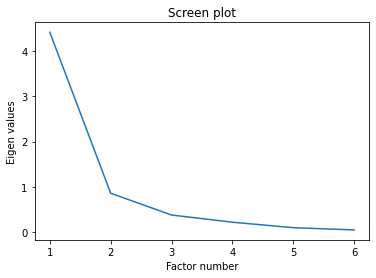

In [31]:
#scree plot 
plt.plot(np.arange(1,p+1),eigval) 
plt.title("Screen plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

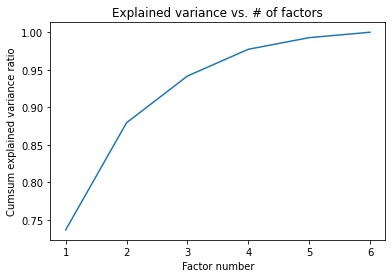

In [34]:
#cumul de variance expliquée 
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

In [36]:
#seuils pour test des bâtons brisés 
bs = 1/np.arange(p,0,-1) 
bs = np.cumsum(bs) 
bs = bs[::-1]

In [38]:
#test des bâtons brisés 
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


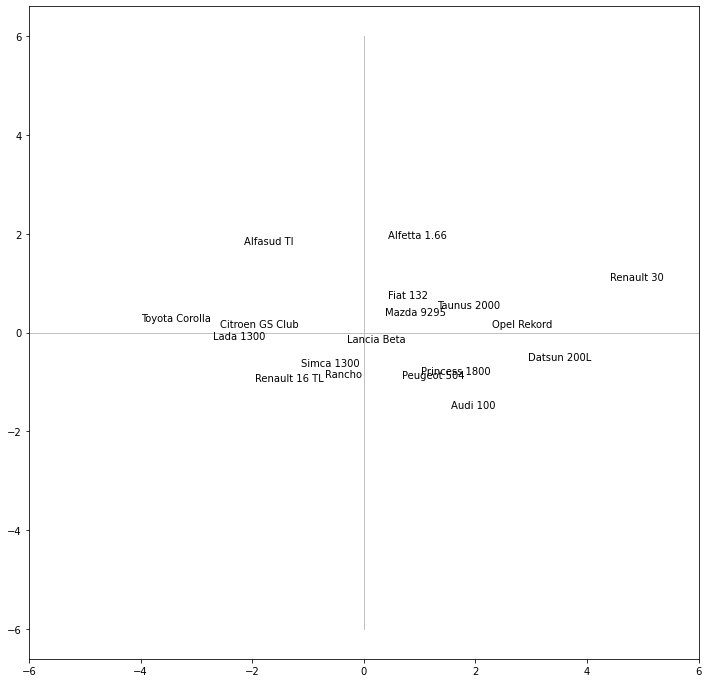

In [40]:
#positionnement des individus dans le premier plan 
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6) 
#même limites en abscisse axes.set_ylim(-6,6) 

#et en ordonnée #placement des étiquettes des observations 
for i in range(n): 
    plt.annotate(X.index[i],(coord[i,0],coord[i,1])) 

#ajouter les axes 
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1) 

#affichage 
plt.show()

In [43]:
#contribution des individus dans l'inertie totale 
di = np.sum(Z**2,axis=1) 
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta 1.66   4.456770
11    Princess 1800   1.952513
12      Datsun 200L  11.112624
13      Taunus 2000   2.452986
14           Rancho   1.963373
15       Mazda 9295   0.684521
16      Opel Rekord   6.083119
17        Lada 1300   7.922198


In [50]:
cos2 = coord**2 
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print("les COS2 pour les deux premiers Facteurs: ")
print("   Cosinus carré : qualité de représentation de la variable sur les composantes _1 et _2.")
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

les COS2 pour les deux premiers Facteurs: 
   Cosinus carré : qualité de représentation de la variable sur les composantes _1 et _2.
                 id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta 1.66  0.042978  0.820652
11    Princess 1800  0.530947  0.362855
12      Datsun 200L  0.778390  0.028137
13      Taunus 2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda 9295  0.217336  0.185337
16      Opel Rekord  0.861900  0.001790
17        Lada 1300  0.926052  0.002607


In [51]:
# contrib_individus.sort_values(by='individu_contrib',inplace=True,ascending=False)

print("\n Individus bien représentés par Facteur 1")
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0]}).sort_values(by='COS2_1',ascending=False).head(5))

print("\n Individus mal représentés par Facteur 1")
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0]}).sort_values(by='COS2_1',ascending=True).head(5))

print("\n Individus bien représentés par Facteur 2")
print(pd.DataFrame({'id':X.index,'COS2_2':cos2[:,1]}).sort_values(by='COS2_2',ascending=False).head(5))

print("\n Individus mal représentés par Facteur 2")
print(pd.DataFrame({'id':X.index,'COS2_2':cos2[:,1]}).sort_values(by='COS2_2',ascending=True).head(5))



 Individus bien représentés par Facteur 1
                 id    COS2_1
3   Citroen GS Club  0.976992
9    Toyota Corolla  0.975219
17        Lada 1300  0.926052
8        Renault 30  0.892431
16      Opel Rekord  0.861900

 Individus mal représentés par Facteur 1
              id    COS2_1
10  Alfetta 1.66  0.042978
5    Lancia Beta  0.081555
4       Fiat 132  0.156579
15    Mazda 9295  0.217336
14        Rancho  0.243273

 Individus bien représentés par Facteur 2
              id    COS2_2
10  Alfetta 1.66  0.820652
6    Peugeot 504  0.575488
4       Fiat 132  0.413826
14        Rancho  0.410469
0     Alfasud TI  0.387670

 Individus mal représentés par Facteur 2
                 id    COS2_2
16      Opel Rekord  0.001790
3   Citroen GS Club  0.001879
17        Lada 1300  0.002607
9    Toyota Corolla  0.003426
12      Datsun 200L  0.028137


In [52]:
# vérifions la théorie - somme en ligne des cos2 = 1
verfif_cos_1 = np.sum(cos2,axis=1)
if np.all ((verfif_cos_1.round(1) == 1.0 )) :
    print('ok - somme des % = 1')
else:
    print("\x1b[31m ko - somme des % differt de 1 \x1b[0m")
    print(verfif_cos_1)

ok - somme des % = 1


In [55]:
#contributions aux axes 
ctr = coord**2 
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j]) 
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta 1.66  0.002407  0.237357
11    Princess 1800  0.013028  0.045978
12      Datsun 200L  0.108701  0.020292
13      Taunus 2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda 9295  0.001870  0.008233
16      Opel Rekord  0.065888  0.000707
17        Lada 1300  0.092194  0.001340


In [57]:
# vérifions la théorie - somme en ligne des cos2 = 1
verfif_cos_1 = np.sum(ctr,axis=0)
if np.all ((verfif_cos_1.round(1) == 1.0 )) :
    print('ok - somme des % = 1')
else:
    print("\x1b[31m ko - somme des % differt de 1 \x1b[0m")
    print(verfif_cos_1)

ok - somme des % = 1


In [58]:
#le champ components_ de l'objet ACP 
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [60]:
#racine carrée des valeurs propres 
sqrt_eigval = np.sqrt(eigval)

In [62]:
#corrélation des variables avec les axes 
corvar = np.zeros((p,p)) 
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs 
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [64]:
#on affiche pour les deux premiers axes 
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V.MAX  0.754710  0.573519


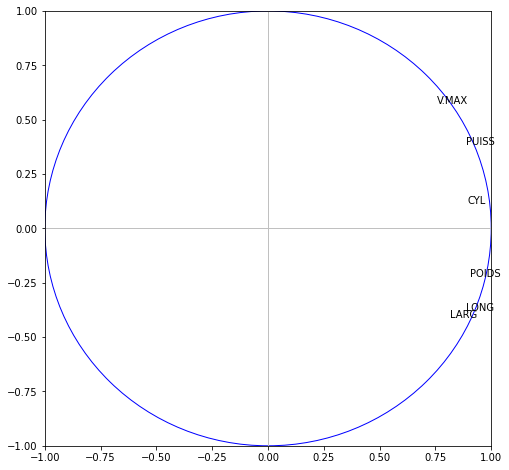

In [67]:
#cercle des corrélations 
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1) 
#affichage des étiquettes (noms des variables) 
for j in range(p): 
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1])) 

#ajouter les axes 
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle 
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle) 

#affichage 
plt.show()

In [69]:
#cosinus carré des variables 
cos2var = corvar**2 
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V.MAX  0.569588  0.328925


## Contribution des variables aux axes (CTR). La contribution est également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe
<a id="ctrvar"></a>

In [71]:
#contributions 
ctrvar = cos2var 
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k] #on n'affiche que pour les deux premiers axes 
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    CYL  0.040845  0.018017
1  PUISS  0.040243  0.201934
2   LONG  0.040180  0.198109
3   LARG  0.033864  0.232452
4  POIDS  0.041924  0.068794
5  V.MAX  0.029144  0.448834


In [72]:
# vérifions la théorie - somme en ligne des cos2 = 1
verfif_cos_1 = np.sum(ctrvar,axis=1)
if np.all ((verfif_cos_1.round(1) == 1.0 )) :
    print('ok - somme des % = 1')
else:
    print("\x1b[31m ko - somme des % differt de 1 \x1b[0m")
    print(verfif_cos_1)

 ko - somme des % differt de 1 
[ 3.77201352 11.1188198   7.20419514  4.19760475  9.95728271  6.37511213]
